In [1]:
import numpy as np
import pandas as pd

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from scipy import stats
import seaborn as sns
from copy import deepcopy
import time

%matplotlib inline

In [5]:
!ls -lhtr

total 982296
-rw-rw-r--@ 1 aderdouri  staff    24K Dec 11  2019 dictionary.html
-rw-rw-r--@ 1 aderdouri  staff   4.9M Dec 11  2019 example_compressed_entry.zip
-rw-rw-r--@ 1 aderdouri  staff   111M Dec 11  2019 test_set.zip
-rw-rw-r--@ 1 aderdouri  staff   363M Dec 11  2019 train_set.zip
-rw-r--r--@ 1 aderdouri  staff   925K May 11 17:12 myAllstateDataAnalysis2012.ipynb


In [7]:
!pip install dask

In [34]:
import pandas as pd
train_data = pd.read_csv('train_set.zip', low_memory=False)
train_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [35]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Row_ID          int64  
 1   Household_ID    int64  
 2   Vehicle         int64  
 3   Calendar_Year   int64  
 4   Model_Year      int64  
 5   Blind_Make      object 
 6   Blind_Model     object 
 7   Blind_Submodel  object 
 8   Cat1            object 
 9   Cat2            object 
 10  Cat3            object 
 11  Cat4            object 
 12  Cat5            object 
 13  Cat6            object 
 14  Cat7            object 
 15  Cat8            object 
 16  Cat9            object 
 17  Cat10           object 
 18  Cat11           object 
 19  Cat12           object 
 20  OrdCat          object 
 21  Var1            float64
 22  Var2            float64
 23  Var3            float64
 24  Var4            float64
 25  Var5            float64
 26  Var6            float64
 27  Var7            float64
 28  Var8      

In [38]:
train_data.describe()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
count,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07
mean,6.592146e+06,4.128242e+06,1.894002e+00,2.006052e+03,1.999312e+03,-1.011925e-02,-6.508702e-02,-2.543391e-02,-5.456792e-02,3.838594e-03,-4.012271e-02,-2.421288e-02,-5.856059e-02,1.468410e-02,1.751169e-02,1.354226e-02,1.851376e-02,1.360658e+00
std,3.805977e+06,2.248415e+06,1.173861e+00,8.123720e-01,5.211866e+00,9.800609e-01,9.684165e-01,1.018902e+00,9.680170e-01,9.910490e-01,9.792078e-01,1.006433e+00,1.003954e+00,1.031040e+00,1.038212e+00,1.027748e+00,1.034274e+00,3.900103e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.005000e+03,1.981000e+03,-2.578222e+00,-2.493393e+00,-2.790335e+00,-2.508216e+00,-3.350344e+00,-2.376657e+00,-2.778491e+00,-2.163042e+00,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
25%,3.296073e+06,2.184932e+06,1.000000e+00,2.005000e+03,1.996000e+03,-6.658971e-01,-8.161519e-01,-8.696874e-01,-7.830189e-01,-6.860239e-01,-6.887650e-01,-8.984857e-01,-6.517680e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
50%,6.592146e+06,4.257083e+06,2.000000e+00,2.006000e+03,2.000000e+03,-3.123581e-01,-1.245062e-01,-2.217581e-01,-1.064709e-01,-1.150981e-01,-2.372568e-01,-4.684193e-01,-2.568567e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
75%,9.888218e+06,6.281433e+06,2.000000e+00,2.007000e+03,2.003000e+03,4.429298e-01,4.806838e-01,7.269956e-01,4.855086e-01,5.331405e-01,4.973212e-01,8.217801e-01,3.409799e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
max,1.318429e+07,7.542113e+06,2.900000e+01,2.007000e+03,2.009000e+03,5.143392e+00,7.829420e+00,5.563325e+00,7.589263e+00,4.018167e+00,4.584289e+00,4.127148e+00,4.735074e+01,6.627110e+00,8.883081e+00,8.691144e+00,6.388802e+00,1.144075e+04


In [39]:
100*len(train_data[train_data['Claim_Amount']>0]) / len(train_data)

0.7251433334673312

In [22]:
100*(95605 / 13184290)

0.7251433334673313

In [40]:
100*len(train_data[train_data['Claim_Amount']==0]) / len(train_data)

99.27485666653267

In [25]:
100*len(dask_df[dask_df['Claim_Amount']==0]) / len(dask_df)

99.27485666653267

In [41]:
a = train_data['Claim_Amount'].skew()
print('Skewness of loss feature is :', a)

Skewness of loss feature is : 70.72036466134124


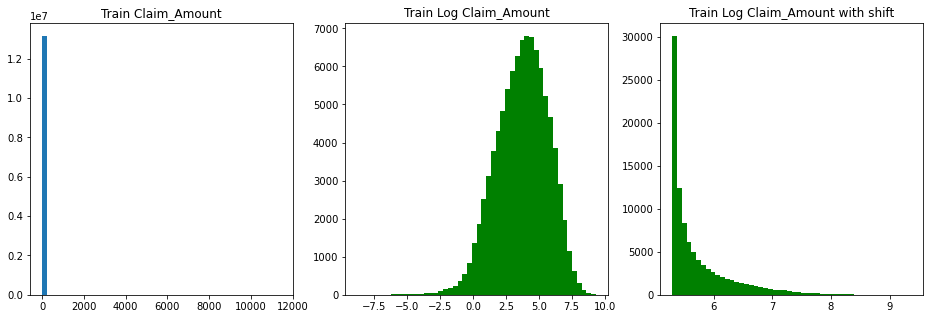

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(16,5)

ax1.hist(train_data['Claim_Amount'], bins=50)
ax1.set_title('Train Claim_Amount')

ax2.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']), bins=50, color='g')
ax2.set_title('Train Log Claim_Amount')

ax3.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']+200), bins=50, color='g')
ax3.set_title('Train Log Claim_Amount with shift')
plt.show()

In [49]:
train_data_greater_zeros = train_data[train_data['Claim_Amount']>0]

## Chargement des données
* Charger le train dataset dans le dataframe df_train
* Charger le test dataset dans le dataframe df_test

## Analyse de la variable cible (Target variable)

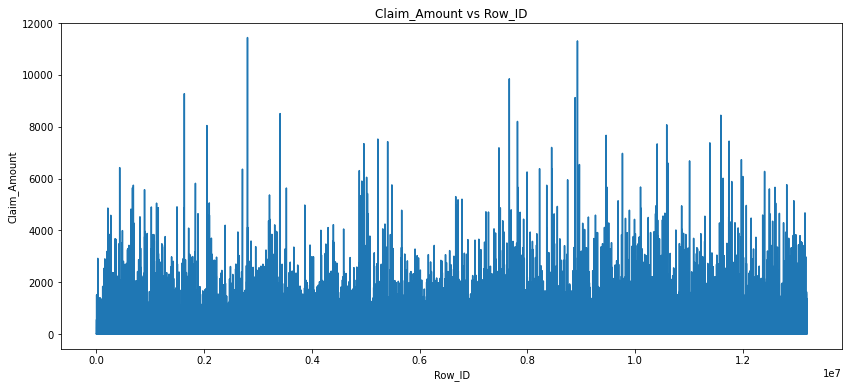

In [45]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Row_ID'],train_data['Claim_Amount'])
plt.xlabel('Row_ID')
plt.ylabel('Claim_Amount')
plt.title('Claim_Amount vs Row_ID')
plt.show()

## Observation:
* we can notice that there are several spikes in the plot of loss feature which represents a huge loss at some time.
* As there are many peaks that we notice we can say that the actual data of this feature is skewed and this can result in suboptimal performance of regression models that we build.
* skewed data effects a lof in your performance.

* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique de perte, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur vos performances.

## Calculate skewness and see how we can reduce skewness.

In [53]:
a = train_data['Claim_Amount'].skew()
print('Skewness of Claim_Amount feature is :',a)

Skewness of Claim_Amount feature is : 70.72036466134124


In [55]:
train_data['logloss'] = np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount'])
print('Skewness of Claim_Amount feature after applying log function :',train_data['logloss'].skew())
train_data = train_data.drop(['logloss'],axis = 1)

Skewness of Claim_Amount feature after applying log function : -0.3856457407474764


## Observation:
* we can see that there is a lot of skewness in the target variable and this will result in wrong predictions.
* we applied log transformation over that target variable and noticed that skewness has decreased a lot.

## Plots for target variable before and after log transformation

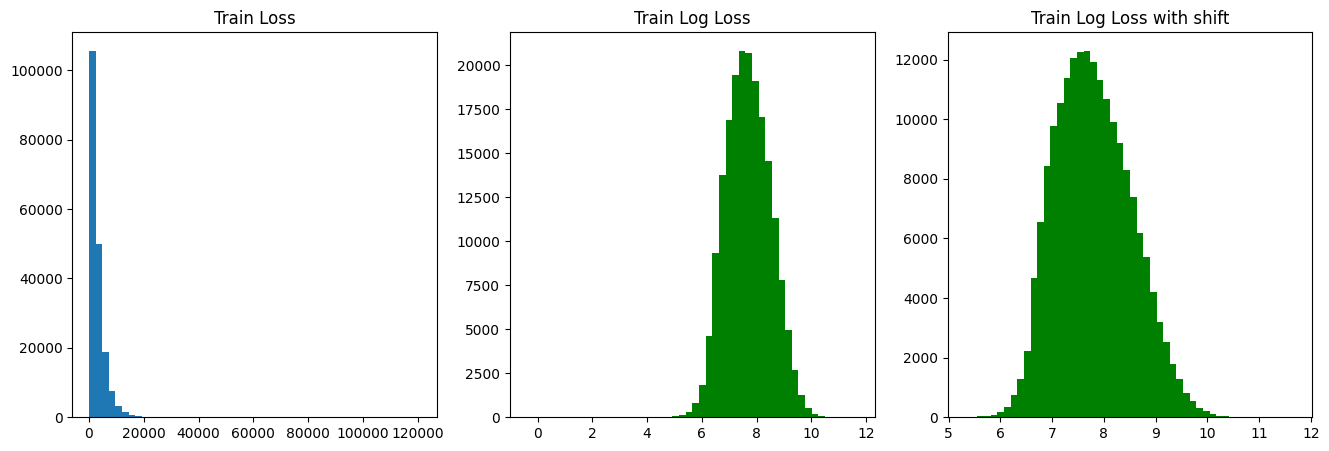

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(16,5)

ax1.hist(train_data['loss'], bins=50)
ax1.set_title('Train Loss')

ax2.hist(np.log(train_data['loss']), bins=50, color='g')
ax2.set_title('Train Log Loss')

ax3.hist(np.log(train_data['loss']+200), bins=50, color='g')
ax3.set_title('Train Log Loss with shift')
plt.show()

## Observation:
* First plot consists of target variable distribution with the actual values given in the data set. we noticed that the distribution is not uniform.
* second plot consists of loss feature after applying log transformation adn we cna observe that this distribution is kind of normal distribution. although mean is not centered to zero , its a lot batter than actual target values in the given dataset.
* When we added a shift value of 200 we can see that the distribution is actually very nice.

## Box plot of target variable

Text(0.5, 1.0, 'Zoomed version of loss feature')

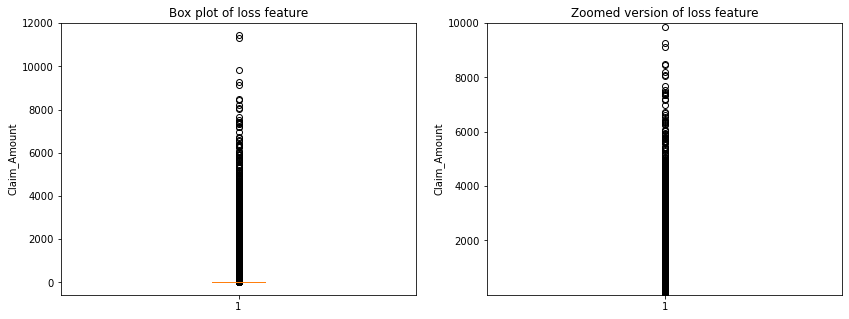

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(14,5)
ax1.boxplot(train_data['Claim_Amount'])
ax1.set_ylabel('Claim_Amount')
ax1.set_title('Box plot of loss feature')


#values = uniq_values_in_categories[uniq_values_in_categories.unique_values <= 25].unique_values
ax2.set_ylim(1,10000)
ax2.boxplot(train_data['Claim_Amount'])
ax2.set_ylabel('Claim_Amount')
ax2.set_title('Zoomed version of loss feature')

## Observation:
* We can immeditely notice that most of the 25, 50 ,75 th percentile values are very less. There are a couple of points where loss is very high, usuallly we treat those as outliers but in this case we have to handle those as at that point the company incurred a huge loss. 
* we should be very careful that we dont overfit our model because of these kinds of points. 

## Checking Train and Test distributions
* We need to check weather both train and test data are from siilar distributions or not. If we do confirm that data is distributed equally we can do test train split for cv as well
* There are so many techniques to check distributions on train and test like welchs test, but they need to be done on feature by feature checking.
* so what we will do is merge both test and train data, include a new target variable as 1 for train and 0 for test data and build a model.
* if model performs very bad that means both came from similar distributions.

### Preparing the data

In [ ]:
#Removing last column in test data which we need to predict. It has Nan values in the given dataset.
train_data_dropped = train_data.drop(['id','loss'], axis=1)
test_data_dropped  = test_data.drop(['id'], axis=1)

print('Shape of Train data :',train_data_dropped.shape)
print('Shape of Test  data :',test_data_dropped.shape)

Shape of Train data : (188318, 130)
Shape of Test  data : (125546, 130)


In [ ]:
#Now we create a label for test and train data as 0 , 1 respectively.
train_data_dropped['target'] = 1
test_data_dropped['target'] = 0
final_df = pd.concat((train_data_dropped,test_data_dropped))

In [ ]:
data_label_encode = deepcopy(final_df)
for c in range(len(categorical_features)):
    data_label_encode[categorical_features[c]] = data_label_encode[categorical_features[c]].astype('category').cat.codes
print('Shape of data after Label Encoding is  :',data_label_encode.shape)

Shape of data after Label Encoding is  : (313864, 131)


In [ ]:
# One hot encoding and dropping index
data_ohe = pd.get_dummies(data=data_label_encode, columns=categorical_features)
data_ohe.reset_index(drop = True, inplace = True)
print('Shape of data after OHE :',data_ohe.shape)

Shape of data after OHE : (313864, 1191)


In [ ]:
# Shuffling the rows in dataset
from sklearn.utils import shuffle
data_label_encode = shuffle(data_label_encode)

In [ ]:
x = data_label_encode.drop(['target'],axis = 1)
y = data_label_encode.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.3)

print('shape of x_train : ',x_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',x_test.shape)
print('shape of y_test  : ',y_test.shape)

shape of x_train :  (219704, 130)
shape of y_train :  (219704,)
shape of x_test  :  (94160, 130)
shape of y_test  :  (94160,)


## Building A model

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predicted_value = model.predict(x_test)
auc = AUC(y_test, predicted_value)
print("Logistic Regression AUC score is : {:.2%}".format(auc))

Logistic Regression AUC score is : 50.00%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)
predicted_value = model.predict(x_test)
auc = AUC(y_test, predicted_value)
print("Random Forest AUC: {:.2%}".format(auc))

Random Forest AUC: 50.13%


## Observation
* As you can see both Linear Regression and Random Forest model gives an AUC of 50%. so we can say that both train and test data have similar distributions and it is hard to seperate both when mixed together.


## Feature Importance

In [ ]:
# https://github.com/brunocampos01/allstate-claims-severity/blob/master/notebooks/1-data-exploration-and-data-cleaning.ipynb

features = [col for col in train_data.columns if col not in ['id','loss']]
feature_imp_dict = dict(zip(features,model.feature_importances_))
imp_features = sorted(feature_imp_dict,key=feature_imp_dict.get, reverse=True)
imp_feature_values = [feature_imp_dict[x] for x in imp_features]

fea_imp_df = pd.DataFrame(data={'feature': imp_features, 'importance': imp_feature_values})
print(fea_imp_df.head())

  feature  importance
0  cont14    0.078168
1  cat112    0.053026
2   cont7    0.038814
3  cat100    0.038733
4   cont6    0.029449


[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, 'Feature Name'),
 Text(0.5, 1.0, 'Variable Importances')]

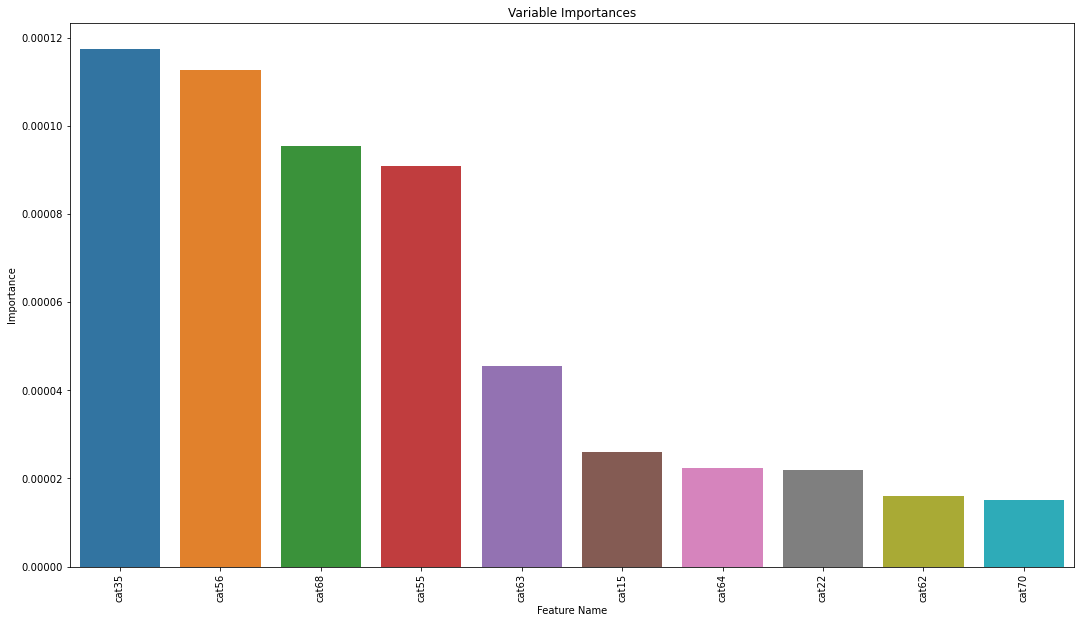

In [ ]:
fig,ax = plt.subplots()
plt.xticks(rotation='vertical')

fig.set_size_inches(18,10)
sns.barplot(data=fea_imp_df.iloc[-10:], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel="Feature Name",
       ylabel='Importance',
       title="Variable Importances")

## Observation:
* You cn observe that last few features lik cat62,cat64,ct70,cat22,...... these have very less feature importance when you trained model on combined test data and train data.

## PCA 

In [ ]:
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.max_rows',1000)

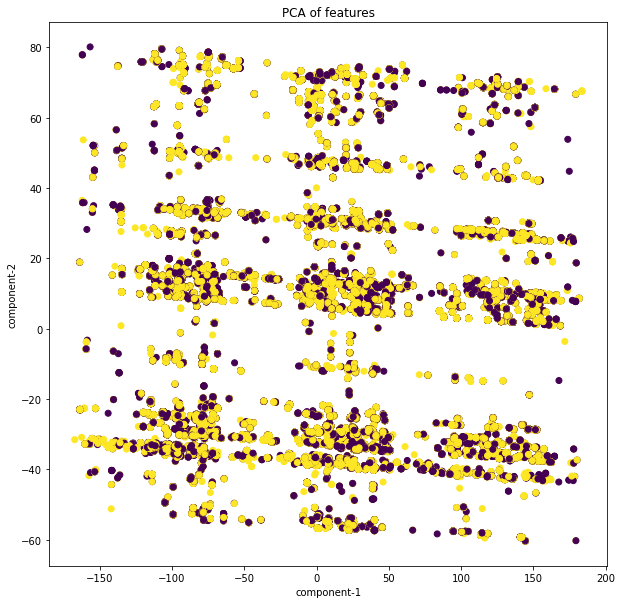

In [ ]:
data_label_encode = shuffle(data_label_encode)
X = data_label_encode.iloc[:, :130]
Y = data_label_encode.iloc[:, 130:]
pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)

plt.figure(figsize = (10,10))
plt.scatter(reduced_X[:,0],reduced_X[:,1],c = np.array(y))
plt.title('PCA of features')
plt.xlabel('component-1')
plt.ylabel('component-2')
plt.show()

## Observation:
* we can notice that we can t seperate data easily even with PCA that embedded on 2 components.